In [76]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [77]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.colors as ListedColormap
from sklearn.model_selection import train_test_split

In [79]:
x1 = [randint(70, 100) for _ in range(42)]
y1 = [randint(0, 100) for _ in range(42)]

x2 = [randint(0, 50) for _ in range(42)]
y2 = [randint(0, 45) for _ in range(42)]

In [80]:
rgen = np.random.RandomState(42)

x1 = rgen.normal(loc=80, scale=10, size=2+40)
y1 = rgen.normal(loc=50, scale=15, size=2+40)

x2 = rgen.normal(loc=30, scale=8, size=2+40)
y2 = rgen.normal(loc=30, scale=8, size=2+40)

k1 = np.array([x1, y1])
k2 = np.array([x2, y2])

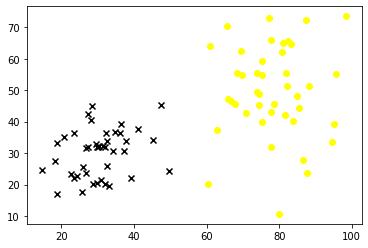

<Figure size 432x288 with 0 Axes>

In [81]:
plt.scatter(k1[0], k1[1], color='yellow', marker='o', label='k1')
plt.scatter(k2[0], k2[1], color='black', marker='x', label='k2')

plt.figure(facecolor='black')

plt.show()

In [1]:
#@title
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01 ,size=1+X.shape[1])
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                

                self.w_[1:] += update * xi
                self.w_[0] += update

                errors += int(update != 0.0)

            self.errors_.append(errors)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1) 

In [83]:
k1 = k1.T
k2 = k2.T

In [84]:
X = np.zeros((84, 2))
X[:42] = k1
X[42:] = k2
X /= 100

In [85]:
y = np.ones((84))
y[:42] = -1

In [86]:
rgen = np.random.RandomState(1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# q = list(zip(X, y))

# rgen.shuffle(q)

# X, y = zip(*q)

# X = np.array(X)
# y = np.array(y)

In [87]:
ppn = Perceptron()
ppn.fit(X, y)                        

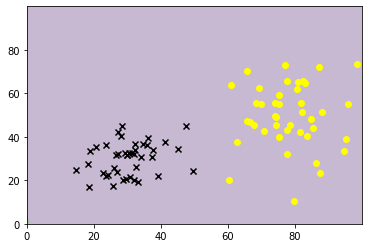

In [88]:
x1_min, x1_max = 0, 100
x2_min, x2_max = 0, 100

resol = 0.01

k1 = k1.T
k2 = k2.T

xx1, xx2 = np.meshgrid(
            np.arange(x1_min, x1_max, resol),
            np.arange(x2_min, x2_max, resol))

Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

Z = Z.reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3)

plt.scatter(k1[0], k1[1], color='yellow', marker='o', label='k1')
plt.scatter(k2[0], k2[1], color='black', marker='x', label='k2')

plt.show()